## Loading of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

## Merging of 12 months Tripdata for the year 2021

In [2]:
data_files = os.listdir("/Users/User/Documents/Tripdata_2021/Tripdata_2021_CSV")
data_files

['202101-divvy-tripdata.csv',
 '202102-divvy-tripdata.csv',
 '202103-divvy-tripdata.csv',
 '202104-divvy-tripdata.csv',
 '202105-divvy-tripdata.csv',
 '202106-divvy-tripdata.csv',
 '202107-divvy-tripdata.csv',
 '202108-divvy-tripdata.csv',
 '202109-divvy-tripdata.csv',
 '202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv']

In [3]:
def load_files(data_files):
    for filename in data_files:
        # Read data from each file
        df = pd.read_csv(f'/Users/User/Documents/Tripdata_2021/Tripdata_2021_CSV/{filename}')
        csvYear = filename[0:4]
        csvMonth = filename[4:6]
        # Add columns "Ticker" and "Year" to the table
        df['year'] = csvYear
        df['month'] = csvMonth
        yield df 

In [4]:
# Generate a list of file names
data = [x for x in data_files]
# load_files takes 1 argument (a list of file names)
tripdata_df = pd.concat(load_files(data))
tripdata_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.890000,-87.720000,member,2021,01
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.900000,-87.690000,member,2021,01
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.900000,-87.700000,member,2021,01
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.920000,-87.690000,member,2021,01
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.900000,-87.700000,casual,2021,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247535,847431F3D5353AB7,electric_bike,2021-12-12 13:36:55,2021-12-12 13:56:08,Canal St & Madison St,13341,NaN,NaN,41.882289,-87.639752,41.890000,-87.610000,casual,2021,12
247536,CF407BBC3B9FAD63,electric_bike,2021-12-06 19:37:50,2021-12-06 19:44:51,Canal St & Madison St,13341,Kingsbury St & Kinzie St,KA1503000043,41.882123,-87.640053,41.889106,-87.638862,member,2021,12
247537,60BB69EBF5440E92,electric_bike,2021-12-02 08:57:04,2021-12-02 09:05:21,Canal St & Madison St,13341,Dearborn St & Monroe St,TA1305000006,41.881956,-87.639955,41.880254,-87.629603,member,2021,12
247538,C414F654A28635B8,electric_bike,2021-12-13 09:00:26,2021-12-13 09:14:39,Lawndale Ave & 16th St,362.0,NaN,NaN,41.860000,-87.720000,41.850000,-87.710000,member,2021,12


## Data Exploration

In [8]:
tripdata_df.describe()

,start_lat,start_lng,end_lat,end_lng
count,5.595063e+06,5.595063e+06,5.590292e+06,5.590292e+06
mean,4.190107e+01,-8.764605e+01,4.190134e+01,-8.764626e+01
std,4.608635e-02,2.872111e-02,4.618916e-02,2.889959e-02
min,4.164000e+01,-8.784000e+01,4.139000e+01,-8.897000e+01
25%,4.188155e+01,-8.766000e+01,4.188184e+01,-8.766000e+01
50%,4.189897e+01,-8.764182e+01,4.189964e+01,-8.764275e+01
75%,4.192914e+01,-8.762773e+01,4.192920e+01,-8.762775e+01
max,4.207000e+01,-8.752000e+01,4.216812e+01,-8.749000e+01


In [9]:
# Check for missing entry
round(tripdata_df.isnull().mean().sort_values(ascending=False)*100, 2)

end_station_name      13.21
end_station_id        13.21
start_station_name    12.35
start_station_id      12.35
end_lat                0.09
end_lng                0.09
ride_id                0.00
rideable_type          0.00
started_at             0.00
ended_at               0.00
start_lat              0.00
start_lng              0.00
member_casual          0.00
year                   0.00
month                  0.00
dtype: float64

In [15]:
# Converting string columns to datatime column
tripdata_df['started_at'] =  pd.to_datetime(tripdata_df['started_at'])
tripdata_df['ended_at'] =  pd.to_datetime(tripdata_df['ended_at'])

In [18]:
tripdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5595063 entries, 0 to 247539
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  year                object        
 14  month               object        
 15  day_of_week         object        
 16  ride_length         float64       
dtypes: datetime64[ns](2), float64(5), object(10)
memory usage: 768.4+ MB


In [16]:
# create day_of_week column
tripdata_df['day_of_week'] = tripdata_df['started_at'].dt.day_name()

# create ride_length column
tripdata_df['ride_length'] = tripdata_df['ended_at'] - tripdata_df['started_at']
tripdata_df['ride_length']= tripdata_df['ride_length']/np.timedelta64(1,'s')

In [19]:
# Filter the dataset
drop_rows = tripdata_df[tripdata_df['ride_length'] <= 0].index

In [20]:
# Drop rows whose ride_length <= 0
tripdata_df.drop(drop_rows, axis=0, inplace= True)

In [21]:
# Sort data
tripdata_df = tripdata_df.sort_values('ride_length', ascending=True)
tripdata_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,day_of_week,ride_length
780189,4AD5FA40E7E6E89B,classic_bike,2021-08-19 16:58:46,2021-08-19 16:58:47,Sheridan Rd & Columbia Ave,660,Sheridan Rd & Columbia Ave,660,42.004583,-87.661406,42.004583,-87.661406,casual,2021,08,Thursday,1.0
154766,0F66D9AE336812B2,electric_bike,2021-07-01 23:51:47,2021-07-01 23:51:48,McClurg Ct & Erie St,KA1503000041,NaN,NaN,41.894750,-87.618447,41.890000,-87.620000,member,2021,07,Thursday,1.0
128308,0D089723ADEAAA92,classic_bike,2021-09-09 16:48:55,2021-09-09 16:48:56,Wells St & Huron St,TA1306000012,Wells St & Huron St,TA1306000012,41.894722,-87.634362,41.894722,-87.634362,member,2021,09,Thursday,1.0
754909,6CF9FA6BA74FA5C4,classic_bike,2021-08-07 17:33:25,2021-08-07 17:33:26,Lincoln Ave & Diversey Pkwy,TA1307000064,Lincoln Ave & Diversey Pkwy,TA1307000064,41.932225,-87.658617,41.932225,-87.658617,member,2021,08,Saturday,1.0
417045,7879B1B276EE56CE,classic_bike,2021-05-06 12:00:28,2021-05-06 12:00:29,Sedgwick St & Webster Ave,13191,Sedgwick St & Webster Ave,13191,41.922167,-87.638888,41.922167,-87.638888,member,2021,05,Thursday,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640346,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,Kedzie Ave & Milwaukee Ave,13085,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.929567,-87.707857,41.889955,-87.680651,casual,2021,07,Thursday,2946429.0
81713,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,Clark St & Lake St,KA1503000012,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.886021,-87.630876,41.889955,-87.680651,casual,2021,06,Saturday,3162083.0
46321,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,State St & Van Buren St,TA1305000035,Wells St & Polk St,SL-011,41.877181,-87.627844,41.872596,-87.633502,casual,2021,05,Sunday,3235296.0
545476,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,Streeter Dr & Grand Ave,13022,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.892278,-87.612043,41.889955,-87.680651,casual,2021,06,Friday,3341501.0


In [36]:
# Save Clean data
tripdata_df.to_csv('tripdata_2021.csv')

## Performing Analysis on the cleaned data

In [22]:
tripdata_df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'day_of_week', 'ride_length'],
      dtype='object')

In [23]:
# select few columns for analysis
new_tripdata_df = tripdata_df[['ride_id', 'rideable_type', 'started_at', 'ended_at','start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'year', 'month', 'ride_length', 'day_of_week']]

In [24]:
new_tripdata_df.reset_index(drop=True)

,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual,year,month,ride_length,day_of_week
0,4AD5FA40E7E6E89B,classic_bike,2021-08-19 16:58:46,2021-08-19 16:58:47,42.004583,-87.661406,42.004583,-87.661406,casual,2021,08,1.0,Thursday
1,0F66D9AE336812B2,electric_bike,2021-07-01 23:51:47,2021-07-01 23:51:48,41.894750,-87.618447,41.890000,-87.620000,member,2021,07,1.0,Thursday
2,0D089723ADEAAA92,classic_bike,2021-09-09 16:48:55,2021-09-09 16:48:56,41.894722,-87.634362,41.894722,-87.634362,member,2021,09,1.0,Thursday
3,6CF9FA6BA74FA5C4,classic_bike,2021-08-07 17:33:25,2021-08-07 17:33:26,41.932225,-87.658617,41.932225,-87.658617,member,2021,08,1.0,Saturday
4,7879B1B276EE56CE,classic_bike,2021-05-06 12:00:28,2021-05-06 12:00:29,41.922167,-87.638888,41.922167,-87.638888,member,2021,05,1.0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590046,99415B003B7E7EEE,docked_bike,2021-07-08 19:29:49,2021-08-11 21:56:58,41.929567,-87.707857,41.889955,-87.680651,casual,2021,07,2946429.0,Thursday
5590047,E6E1E5BFFD72ECEC,docked_bike,2021-06-05 23:33:51,2021-07-12 13:55:14,41.886021,-87.630876,41.889955,-87.680651,casual,2021,06,3162083.0,Saturday
5590048,BDA1217EC8532C7B,docked_bike,2021-05-02 02:56:07,2021-06-08 13:37:43,41.877181,-87.627844,41.872596,-87.633502,casual,2021,05,3235296.0,Sunday
5590049,7F0578ABF030FC83,docked_bike,2021-06-04 22:03:33,2021-07-13 14:15:14,41.892278,-87.612043,41.889955,-87.680651,casual,2021,06,3341501.0,Friday


In [25]:
new_tripdata_df.groupby('member_casual').agg(min_ride_length = ('ride_length', 'min'), max_ride_length = ('ride_length', 'max')).reset_index()

,member_casual,min_ride_length,max_ride_length
0,casual,1.0,3356649.0
1,member,1.0,93596.0


In [26]:
# mode and mean of day of the week
mode_day_of_week = new_tripdata_df.day_of_week.mode()
mean_day_of_week = round(new_tripdata_df.ride_length.mean(), 2)
print(mode_day_of_week)
print(mean_day_of_week)

0    Saturday
dtype: object
1316.37


In [27]:
# maximum and minimum trip distance
max_trip_distance = new_tripdata_df.ride_length.max()
min_trip_distance = new_tripdata_df.ride_length.min()
print(f'{max_trip_distance} seconds')
print(f'{min_trip_distance} seconds')

3356649.0 seconds
1.0 seconds


In [37]:
#count the number of different bikes used by cyclistic
pivot_rideable_type = pd.pivot_table(new_tripdata_df, values='ride_id', index='rideable_type', aggfunc='count')
pivot_rideable_type

,ride_id
rideable_type,
classic_bike,3248142
docked_bike,312073
electric_bike,2029836


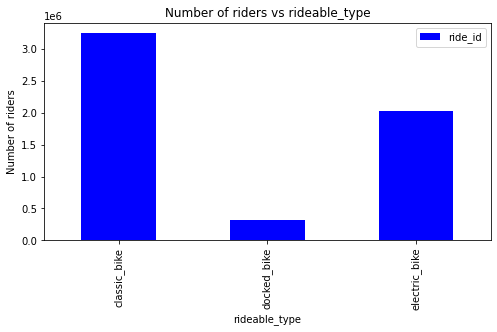

In [43]:
# visualizing the count of different bikes used by cyclistic
pivot_rideable_type.plot(kind = 'bar', ylabel='Number of riders', xlabel='rideable_type', title ='Number of riders vs rideable_type', color = 'blue', figsize = (8, 4))
plt.show()

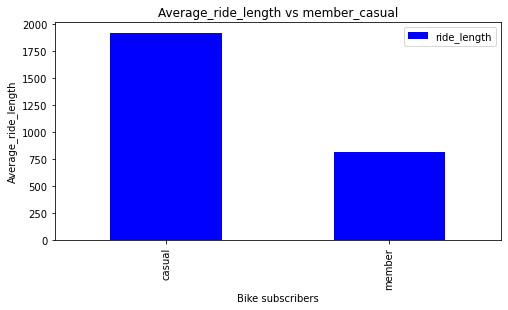

In [52]:
# Visualize the average trip length vs different types of subscriber
pivot_ride_member = pd.pivot_table(new_tripdata_df, values='ride_length', index='member_casual', aggfunc='mean')
pivot_ride_member.plot(kind = 'bar', ylabel='Average_ride_length', xlabel='Bike subscribers', title ='Average_ride_length vs member_casual',  color = 'blue', figsize = (8, 4))
plt.show()

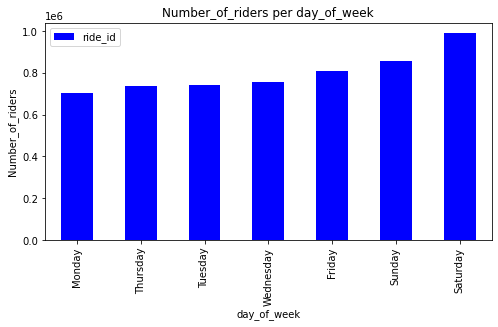

In [51]:
# Visualize the total riders per day of week
pivot_user_day = pd.pivot_table(new_tripdata_df, values='ride_id', index='day_of_week', aggfunc='count')
pivot_user_day.sort_values(by=['ride_id']).plot(kind = 'bar',  ylabel='Number_of_riders', xlabel = 'day_of_week',title = 'Number_of_riders per day_of_week', color = 'blue', figsize = (8, 4))
plt.show()

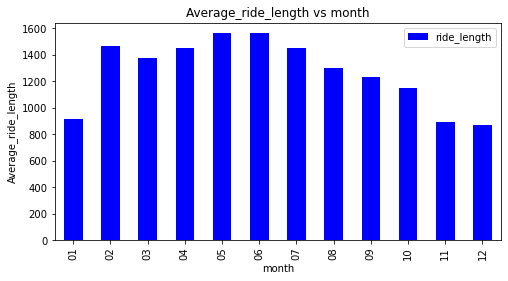

In [50]:
# Visualize the average trip length vs month
pivot_ride_length_day = pd.pivot_table(new_tripdata_df, values='ride_length', index='month', aggfunc='mean')
pivot_ride_length_day.plot(kind = 'bar', ylabel='Average_ride_length', xlabel='month', title ='Average_ride_length vs month', color = 'blue', figsize = (8, 4))
plt.show()